<a href="https://colab.research.google.com/github/N0VA-code/CS4v98_Machine-Learning-based-Hateful-meme-detector/blob/main/LabelRevewing_overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reviewer Label Counts:
  0      598
 1     1445
-1      473
-5      425
-7        0
-88       4
-99       3
Name: reviewer_label, dtype: int64

Progress Rate: 16.82%
Match Rate: 60.95%


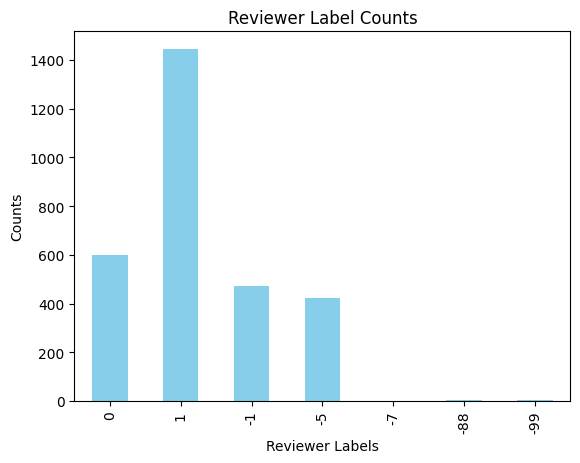

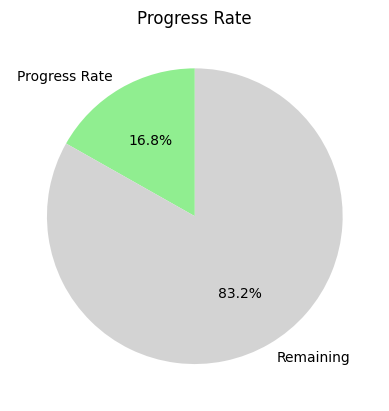

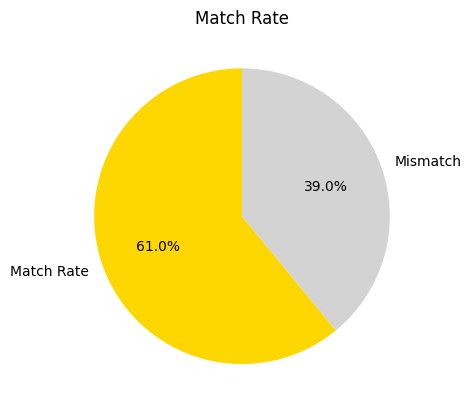

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_labels(csv_file):
    data = pd.read_csv(csv_file)

    # Count the number of occurrences for each reviewer_label (0, 1, -1, -5, -7, -88, -99) and display the results.
    specified_labels = [0, 1, -1, -5, -7, -88, -99]
    label_counts = data['reviewer_label'].value_counts().reindex(specified_labels, fill_value=0)

    # Calculate the progress rate, defined as the proportion of reviewer_label entries that are marked as 0, 1, or -99, out of the total reviewer_label entries (including those not labeled).
    progress_labels = [0, 1, -99]
    progress_count = data['reviewer_label'].isin(progress_labels).sum()
    total_labels = len(data['reviewer_label'])
    progress_rate = progress_count / total_labels

    # Calculate the label agreement rate, which is the percentage of cases where both reviewer_label and label are not empty, and the values in these two fields are the same.
    non_empty_labels = data.dropna(subset=['reviewer_label', 'label'])
    matches = non_empty_labels[non_empty_labels['reviewer_label'] == non_empty_labels['label']].shape[0]
    match_rate = matches / non_empty_labels.shape[0] if non_empty_labels.shape[0] > 0 else 0

    return label_counts, progress_rate, match_rate

def visualize_data(label_counts, progress_rate, match_rate):
    # Print the results
    print("Reviewer Label Counts:\n", label_counts)
    print("\nProgress Rate: {:.2f}%".format(progress_rate * 100))
    print("Match Rate: {:.2f}%".format(match_rate * 100))

    # Visualize label counts using a bar chart
    label_counts.plot(kind='bar', color='skyblue')
    plt.title('Reviewer Label Counts')
    plt.xlabel('Reviewer Labels')
    plt.ylabel('Counts')
    plt.show()

    # Visualize progress rate using a pie chart
    plt.pie([progress_rate, 1 - progress_rate], labels=['Progress Rate', 'Remaining'], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightgrey'])
    plt.title('Progress Rate')
    plt.show()

    # Visualize match rate using a pie chart
    plt.pie([match_rate, 1 - match_rate], labels=['Match Rate', 'Mismatch'], autopct='%1.1f%%', startangle=90, colors=['gold', 'lightgrey'])
    plt.title('Match Rate')
    plt.show()

csv_file = '/content/memeDB.csv'  # Update .csv file in here
label_counts, progress_rate, match_rate = analyze_labels(csv_file)

visualize_data(label_counts, progress_rate, match_rate)
